<a href="https://colab.research.google.com/github/AndreaBravo52/RedesNeuronales/blob/main/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrea Bravo A01028579

19 de abril, 2022

# Redes Neuronales


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
seed = 7
np.random.seed(seed)

In [ ]:
# The first way is by using the already existing functions:
X,y = make_circles(n_samples = 3000, noise = 0.08, factor=0.3)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(3000, 2)
(3000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# The other way is by hand:
X0 = [X[i,:] for i in range(len(y)) if y[i] == 0] # returns the row where the corresponding label is 0
X1 = [X[i,:] for i in range(len(y)) if y[i] == 1] # returns the row where the corresponding label is 1

X0_np = np.array(X0) # convert it into an array
X1_np = np.array(X1)

X0_train = X0_np[:1000,:].T # picked the first 1000 samples in the second axis
X0_test = X0_np[1000:,:].T # picked the remaining 500 samples in the second axis

X1_train = X1_np[:1000,:].T  # picked the first 1000 samples in the second axis
X1_test = X1_np[1000:,:].T # picked the remaining 500 samples in the second axis

X_train = np.hstack([X0_train,X1_train]).T # all training examples
y_train=np.zeros((1,2000))
y_train[0, 1000:] = 1

X_test = np.hstack([X0_test,X1_test]).T # all test examples
y_test=np.zeros((1,1000))
y_test[0, 500:] = 1

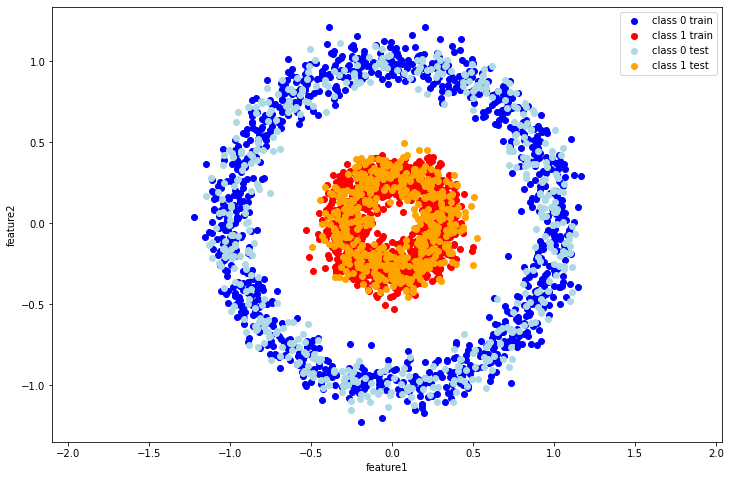

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X0_train[0,:],X0_train[1,:], color = 'b', label = 'class 0 train')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'r',  label = 'class 1 train')
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(2000, 2)
y_train:	(1, 2000)
x_test:		(1000, 2)
y_test:		(1, 1000)


In [ ]:
# Hyper-parameters
training_epochs = 400 # Total number of training epochs
learning_rate = 0.03 # The learning rate

In [ ]:
# create model
def create_model():
    model = Sequential()
    # Input layer
    model.add(Dense(6, input_dim=2, kernel_initializer='normal', activation='relu'))
    # Output layer
    model.add(Dense(y_train.T.shape[1], activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.fit(
    X_train, y_train.T,
    epochs= training_epochs,
    batch_size = 516,
    validation_data = (X_test, y_test.T),
    verbose = 0
)

In [ ]:
prediction_values = model.predict(X_test)

In [ ]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 98.57%


In [ ]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
63/63 [==============================] - 0s 1ms/step - loss: 9.2770e-04 - accuracy: 1.0000
loss=0.0009, accuracy: 100.0000%
Evaluating on testing set...
32/32 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
loss=0.0017, accuracy: 100.0000%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


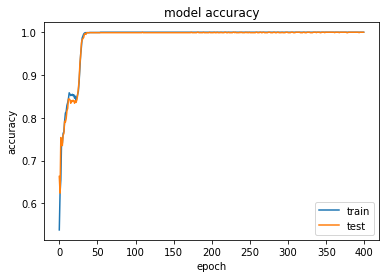

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 0.6937

Minimum Loss : 0.0009

Loss difference : 0.6927


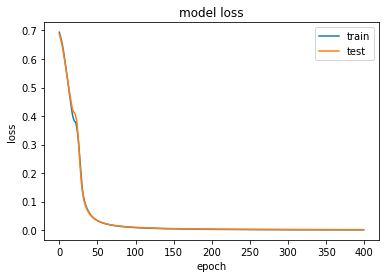

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

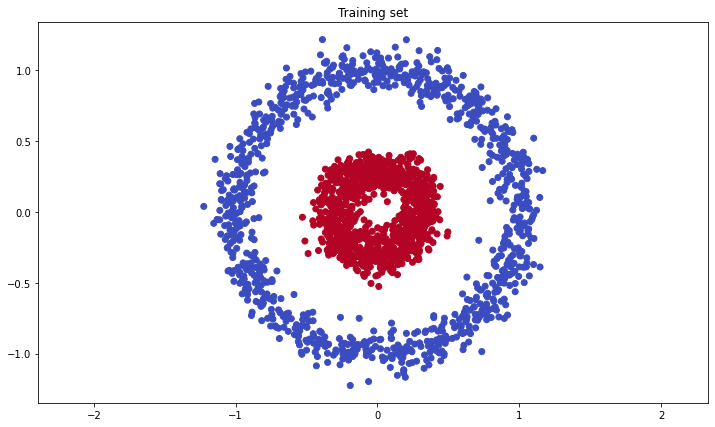

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[0,:] ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

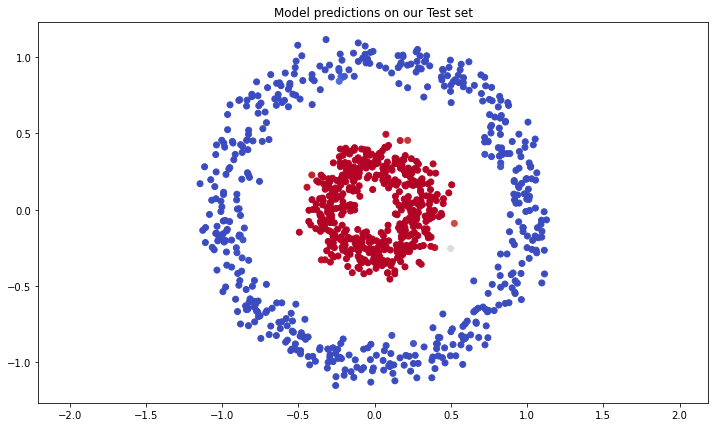

In [ ]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

Predicciones

In [ ]:
print(model.predict([[-0.25,-0.25]]))
print(model.predict([[1.2,0]]))
print(model.predict([[-0.5,10]]))
print(model.predict([[-0.7,0.6]]))
print(model.predict([[0,-0.2]]))

[[0.9998725]]
[[8.237482e-10]]
[[0.00164744]]
[[8.930884e-07]]
[[0.99999976]]


## Base de Iris

In [ ]:
iris=pd.read_csv('drive/MyDrive/iris.csv')

In [ ]:
X=iris.drop('Species', axis=1)
y=iris['Species']

In [ ]:
    labelEncoder = preprocessing.LabelEncoder()
    encodedSpecies = labelEncoder.fit_transform(y)
    print (encodedSpecies)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, encodedSpecies, test_size = 0.20)

In [ ]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(120, 4)
y_train:	(120,)
x_test:		(30, 4)
y_test:		(30,)


In [ ]:
# Hyper-parameters
training_epochs = 400 # Total number of training epochs
learning_rate = 0.03 # The learning rate

In [ ]:
# create model
def create_model():
    model = Sequential()
    # Input layer
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 6)                 30        
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.fit(
    X_train, y_train.T,
    epochs= training_epochs,
    batch_size = 51,
    validation_data = (X_test, y_test.T),
    verbose = 0
)

In [ ]:
prediction_values = model.predict(X_test)

In [ ]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 55.38%


In [ ]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6833
loss=0.0000, accuracy: 68.3333%
Evaluating on testing set...
1/1 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.5667
loss=0.0000, accuracy: 56.6667%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


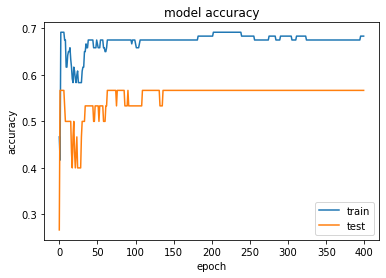

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 0.0000

Minimum Loss : 0.0000

Loss difference : 0.0000


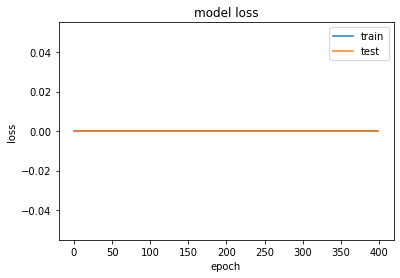

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

Las visualizaciones que se hicieron anteriormente no son replicables para la base de datos de iris, ya que en ese caso habia unicamente dos variables, y se categorizaban de manera binaria. En la base de datos de iris, hay 4 variables y estas se categorizan en 3 grupos, por lo que no se puede llevar a cabo la misma visualización.

Predicciones

In [ ]:
print(model.predict([[5.0, 3.6, 1.4, 0.2]]))
print(model.predict([[6.7, 3.0, 5.2, 2.3]]))
print(model.predict([[5.9, 3.0, 5.1, 1.8]]))
print(model.predict([[5.1, 3.5, 1.4, 0.2]]))
print(model.predict([[5.7,	2.6, 3.5,	1.0	]]))

[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]


# Comparación de algoritmos
Definitivamente el algoritmo que peor clasificó la base de datos de Iris fue el de Red neuronal, que obtuvo un accuracy máximo de 56.7%. El algoritmo de Árbol de desición tuvo un accuracy de 95%. Con el algoritmo de support vector machine se realizaron tres diferentes kernels, el kernel polinomial tuvo el peor desempeño de los tres con un accuracy de 93%, despues el gausiano con 96%, y hasta arriba el lineal con un accuracy de 100%. Es por esto que considero que el algoritmo de support vector machine es el que realiza un mejor trabajo para la clasificación de la especie de la base de datos de iris. El accuracy de 100% del kernel lineal no es algo que me parezca realista, y puede que este callendo en overfitting, pero las soluciones de los otros dos kernels también son muy buenas y es el que mejor clasifica la base de iris. Creo que la razón por que la red neuronal no hizo un buen trabajo fue porque le puse pocos layers, y además no estoy segura de que este generando tres diferentes categorías, en la creación del modelo cambie un parámetro que en el tutorial era binario, pero al ver las predicciones con números esto no fue el caso.